In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from subprocess import check_output
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/Medicalshows/main.csv')

In [3]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [4]:
data.shape

(300000, 15)

In [5]:
data.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.809014,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [6]:
data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [7]:
data.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [8]:
data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [9]:
data.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [10]:
data.AppointmentRegistration = data.AppointmentRegistration.apply(np.datetime64)
data.AppointmentData = data.AppointmentData.apply(np.datetime64)
data.AwaitingTime = data.AwaitingTime.apply(abs)

In [11]:
print(data.AppointmentRegistration.head())
print(data.AppointmentData.head())
print(data.AwaitingTime.head())

0   2014-12-16 14:46:25
1   2015-08-18 07:01:26
2   2014-02-17 12:53:46
3   2014-07-23 17:02:11
4   2015-10-21 15:20:09
Name: AppointmentRegistration, dtype: datetime64[ns]
0   2015-01-14
1   2015-08-19
2   2014-02-18
3   2014-08-07
4   2015-10-27
Name: AppointmentData, dtype: datetime64[ns]
0    29
1     1
2     1
3    15
4     6
Name: AwaitingTime, dtype: int64


In [ ]:
# It is interesting to note that the time portions have vanished from the Appointment Data timedeltas, 
# because all appointment times were set exactly to 00:00:00. Also, if it's not clear already, the AwaitingTime 
# is the rounded number of days from registration to appointment. Here is the proof:

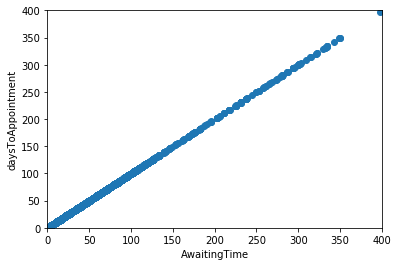

In [12]:
daysToAppointment = data.AppointmentData - data.AppointmentRegistration
daysToAppointment = daysToAppointment.apply(lambda x: x.total_seconds() / (3600 * 24))
plt.scatter(data.AwaitingTime, daysToAppointment)
plt.axis([0, 400, 0, 400])
plt.xlabel('AwaitingTime')
plt.ylabel('daysToAppointment')
plt.show()

In [13]:
# We also create a new feature called HourOfTheDay, which will indicate the hour of the day at which the 
# appointment was booked. This will be derived off AppointmentRegistration, thus:

In [14]:
def calculateHour(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

data['HourOfTheDay'] = data.AppointmentRegistration.apply(calculateHour)

In [15]:
data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime', 'HourOfTheDay'],
      dtype='object')

In [17]:
data.HourOfTheDay.head()

0    15
1     7
2    13
3    17
4    15
Name: HourOfTheDay, dtype: int64

In [18]:
data.isnull().any()

Age                        False
Gender                     False
AppointmentRegistration    False
AppointmentData            False
DayOfTheWeek               False
Status                     False
Diabetes                   False
Alchoholism                False
Hypertension               False
Handicap                   False
Smokes                     False
Scholarship                False
Tuberculosis               False
Sms_Reminder               False
AwaitingTime               False
HourOfTheDay               False
dtype: bool

In [24]:
# Next we check for any erroneous values and NaNs in data.

print('Age:',sorted(data.Age.unique()))
print('Gender:',data.Gender.unique())
print('DayOfTheWeek:',data.DayOfTheWeek.unique())
print('Status:',data.Status.unique())
print('Diabetes:',data.Diabetes.unique())
print('Alchoholism:',data.Alchoholism.unique())
print('Hypertension:',data.Hypertension.unique())
print('Handicap:',data.Handicap.unique())
print('Smokes:',data.Smokes.unique())
print('Scholarship:',data.Scholarship.unique())
print('Tuberculosis:',data.Tuberculosis.unique())
print('Sms_Reminder:',data.Sms_Reminder.unique())
print('AwaitingTime:',sorted(data.AwaitingTime.unique()))
print('HourOfTheDay:', sorted(data.HourOfTheDay.unique()))




Age: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 108, 113]
Gender: ['M' 'F']
DayOfTheWeek: ['Wednesday' 'Tuesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']
Status: ['Show-Up' 'No-Show']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [0 1]
Handicap: [0 1 2 3 4]
Smokes: [0 1]
Scholarship: [0 1]
Tuberculosis: [0 1]
Sms_Reminder: [0 1 2]
AwaitingTime: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

In [ ]:
# It is clear that we do not have any NaNs anywhere in the data. However, we do have some impossible ages
# such as -2 and -1, and some pretty absurd ages such as 100 and beyond.yes i know it possible to live upto 113 but still

In [25]:
data = data[(data.Age >= 0) & (data.Age <= 95)]

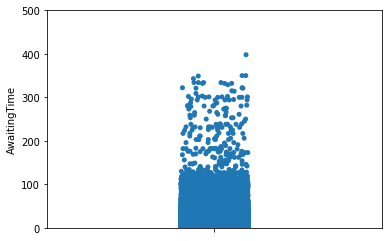

In [34]:
sns.stripplot(data = data, y = 'AwaitingTime', jitter = True)
plt.ylim(0, 500)
plt.show()

In [ ]:
#More to come